In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import numpy as np
from pandas import Series,DataFrame
import scipy.stats.stats as stats
import statsmodels.api as sm
import math

C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


[8311. 1159. 8311. ... 1159. 2554. 2554.]


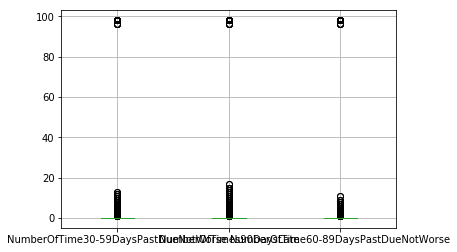

In [7]:



# 
def set_missing(df):
    # 
    process_df = df.ix[:,[5,0,1,2,3,4,6,7,8,9]]
    # 
    known = process_df[process_df.MonthlyIncome.notnull()].as_matrix()
    unknown = process_df[process_df.MonthlyIncome.isnull()].as_matrix()
    # X
    X = known[:, 1:]
    # y
    y = known[:, 0]
    # 
    rfr = RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,y)
    # 
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print(predicted)
    # 
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df
 
if __name__ == '__main__':
    #
    data = pd.read_csv('cs-training.csv')
    #
    data.describe().to_csv('DataDescribe.csv')#
    data=set_missing(data)#
    data=data.dropna()#
    data = data.drop_duplicates()#
    data.to_csv('MissingData.csv',index=False)
    data.describe().to_csv('MissingDataDescribe.csv')


    data=data[data['age']>0]
    
    data379=data[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']]
    data379.boxplot()
    data = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]
    data379 = data[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']]
    data379.boxplot()
    plt.show()
    data.to_csv('PretreatmentData.csv')


In [3]:
def outlier_processing(df,col):
    s=df[col]
    oneQuoter=s.quantile(0.25)
    threeQuote=s.quantile(0.75)
    irq=threeQuote-oneQuoter
    min=oneQuoter-1.5*irq
    max=threeQuote+1.5*irq
    df=df[df[col]<=max]
    df=df[df[col]>=min]
    return df
 
if __name__ == '__main__':
    data = pd.read_csv('MissingData.csv')
    # 
    data = data[data['age'] > 0]
    data = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]#
    data['SeriousDlqin2yrs']=1-data['SeriousDlqin2yrs']
    Y = data['SeriousDlqin2yrs']
    X = data.ix[:, 1:]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    # print(Y_train)
    train = pd.concat([Y_train, X_train], axis=1)
    test = pd.concat([Y_test, X_test], axis=1)
    clasTest = test.groupby('SeriousDlqin2yrs')['SeriousDlqin2yrs'].count()
    train.to_csv('TrainData.csv',index=False)
    test.to_csv('TestData.csv',index=False)
    print(train.shape)
    print(test.shape)

C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


(101747, 11)
(43607, 11)


C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


                       min           max    sum  total      rate       woe  \
Bucket                                                                       
(-0.001, 0.0312]  0.000000      0.031215  24941  25437  0.980501  1.283343   
(0.0312, 0.158]   0.031218      0.157927  24895  25437  0.978692  1.192807   
(0.158, 0.558]    0.157928      0.558119  24149  25436  0.949402  0.297580   
(0.558, 50708.0]  0.558127  50708.000000  20949  25437  0.823564 -1.093666   

                  goodattribute  badattribute  
Bucket                                         
(-0.001, 0.0312]       0.262719      0.072802  
(0.0312, 0.158]        0.262235      0.079554  
(0.158, 0.558]         0.254377      0.188904  
(0.558, 50708.0]       0.220669      0.658741  
                min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                      
(20.999, 33.0]   21   33  10081  11342  0.888820 -0.555602       0.106190   
(33.0, 40.0]

C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


                        min            max    sum  total      rate       woe  \
Bucket                                                                         
(-0.001, 0.236]    0.000000       0.236159  31922  33916  0.941208  0.138803   
(0.236, 0.547]     0.236160       0.547099  31785  33915  0.937196  0.068523   
(0.547, 307001.0]  0.547112  307001.000000  31227  33916  0.920716 -0.182236   

                   goodattribute  badattribute  
Bucket                                          
(-0.001, 0.236]         0.336255      0.292676  
(0.236, 0.547]          0.334812      0.312638  
(0.547, 307001.0]       0.328934      0.394687  


C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


                        min        max    sum  total      rate       woe  \
Bucket                                                                     
(-0.001, 3400.0]        0.0     3400.0  31500  34162  0.922077 -0.163440   
(3400.0, 6866.0]     3401.0     6866.0  31209  33674  0.926798 -0.095835   
(6866.0, 3008750.0]  6867.0  3008750.0  32225  33911  0.950282  0.316034   

                     goodattribute  badattribute  
Bucket                                            
(-0.001, 3400.0]          0.331809      0.390724  
(3400.0, 6866.0]          0.328744      0.361808  
(6866.0, 3008750.0]       0.339446      0.247468  
             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]    0    0  81862  85334  0.959313  0.525955       0.862304   
(0.0, 1.0]     1    1   9467  11139  0.849897 -0.900558       0.099722   
(1.0, 3.0]     2    3   3102   4363  0.710979 -1.734207       0.0326

C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
C:\Users\juncheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]    0    0  33961  37049  0.916651 -0.236660       0.357733   
(0.0, 1.0]     1    1  34093  35985  0.947423  0.257108       0.359123   
(1.0, 2.0]     2    2  20636  21854  0.944266  0.195478       0.217372   
(2.0, 3.0]     3    3   4002   4310  0.928538 -0.069900       0.042156   
(3.0, inf]     4   54   2242   2549  0.879561 -0.646074       0.023616   

             badattribute  
Bucket                     
(-inf, 0.0]      0.453251  
(0.0, 1.0]       0.277704  
(1.0, 2.0]       0.178776  
(2.0, 3.0]       0.045208  
(3.0, inf]       0.045061  
             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]    0    0  91651  96651  0.948267  0.274201       0.965418   
(0.0, 1.0]     1    1   2746   3981  0.689776 -1.835275       0

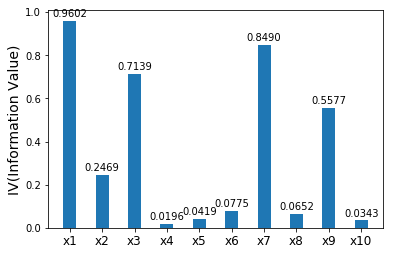

In [5]:
 # 
def mono_bin(Y, X, n = 20):
    r = 0
    good=Y.sum()
    bad=Y.count()-good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n)})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_index(by = 'min'))
    print("=" * 60)
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua=X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe=list(d4['woe'].round(3))
    return d4,iv,cut,woe
#
def self_bin(Y,X,cat):
    good=Y.sum()
    bad=Y.count()-good
    d1=pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.cut(X,cat)})
    d2=d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_index(by='min'))
    print("=" * 60)
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv,woe
#
def replace_woe(series,cut,woe):
    list=[]
    i=0
    while i<len(series):
        value=series[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list.append(woe[m])
        i += 1
    return list
#
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores
 
#
def compute_score(series,cut,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list
 
if __name__ == '__main__':
    data = pd.read_csv('TrainData.csv')
    pinf = float('inf')#
    ninf = float('-inf')#
    dfx1, ivx1,cutx1,woex1=mono_bin(data.SeriousDlqin2yrs,data.RevolvingUtilizationOfUnsecuredLines,n=10)
    dfx2, ivx2,cutx2,woex2=mono_bin(data.SeriousDlqin2yrs, data.age, n=10)
    dfx4, ivx4,cutx4,woex4 =mono_bin(data.SeriousDlqin2yrs, data.DebtRatio, n=20)
    dfx5, ivx5,cutx5,woex5 =mono_bin(data.SeriousDlqin2yrs, data.MonthlyIncome, n=10)
    # 
    cutx3 = [ninf, 0, 1, 3, 5, pinf]
    cutx6 = [ninf, 1, 2, 3, 5, pinf]
    cutx7 = [ninf, 0, 1, 3, 5, pinf]
    cutx8 = [ninf, 0,1,2, 3, pinf]
    cutx9 = [ninf, 0, 1, 3, pinf]
    cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]
    dfx3, ivx3,woex3 = self_bin(data.SeriousDlqin2yrs, data['NumberOfTime30-59DaysPastDueNotWorse'], cutx3)
    dfx6, ivx6 ,woex6= self_bin(data.SeriousDlqin2yrs, data['NumberOfOpenCreditLinesAndLoans'], cutx6)
    dfx7, ivx7,woex7 = self_bin(data.SeriousDlqin2yrs, data['NumberOfTimes90DaysLate'], cutx7)
    dfx8, ivx8,woex8 = self_bin(data.SeriousDlqin2yrs, data['NumberRealEstateLoansOrLines'], cutx8)
    dfx9, ivx9,woex9 = self_bin(data.SeriousDlqin2yrs, data['NumberOfTime60-89DaysPastDueNotWorse'], cutx9)
    dfx10, ivx10,woex10 = self_bin(data.SeriousDlqin2yrs, data['NumberOfDependents'], cutx10)
    ivlist=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]
    index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
    fig1 = plt.figure(1)
    ax1 = fig1.add_subplot(1, 1, 1)
    x = np.arange(len(index))+1
    ax1.bar(x, ivlist, width=0.4)
    ax1.set_xticks(x)
    ax1.set_xticklabels(index, rotation=0, fontsize=12)
    ax1.set_ylabel('IV(Information Value)', fontsize=14)
    for a, b in zip(x, ivlist):
        plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
    # 
    data['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(data['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
    data['age'] = Series(replace_woe(data['age'], cutx2, woex2))
    data['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(data['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
    data['DebtRatio'] = Series(replace_woe(data['DebtRatio'], cutx4, woex4))
    data['MonthlyIncome'] = Series(replace_woe(data['MonthlyIncome'], cutx5, woex5))
    data['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(data['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
    data['NumberOfTimes90DaysLate'] = Series(replace_woe(data['NumberOfTimes90DaysLate'], cutx7, woex7))
    data['NumberRealEstateLoansOrLines'] = Series(replace_woe(data['NumberRealEstateLoansOrLines'], cutx8, woex8))
    data['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(data['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
    data['NumberOfDependents'] = Series(replace_woe(data['NumberOfDependents'], cutx10, woex10))
    data.to_csv('WoeData.csv', index=False)
 
    test= pd.read_csv('TestData.csv')
    # 
    test['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
    test['age'] = Series(replace_woe(test['age'], cutx2, woex2))
    test['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
    test['DebtRatio'] = Series(replace_woe(test['DebtRatio'], cutx4, woex4))
    test['MonthlyIncome'] = Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
    test['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
    test['NumberOfTimes90DaysLate'] = Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
    test['NumberRealEstateLoansOrLines'] = Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
    test['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
    test['NumberOfDependents'] = Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
    test.to_csv('TestWoeData.csv', index=False)
 
    #
    #
    coe=[9.738849,0.638002,0.505995,1.032246,1.790041,1.131956]
    # 
    p = 20 / math.log(2)
    q = 600 - 20 * math.log(20) / math.log(2)
    baseScore = round(q + p * coe[0], 0)
    # 
    x1 = get_score(coe[1], woex1, p)
    x2 = get_score(coe[2], woex2, p)
    x3 = get_score(coe[3], woex3, p)
    x7 = get_score(coe[4], woex7, p)
    x9 = get_score(coe[5], woex9, p)
    print(x1,x2, x3, x7, x9)
    test1 = pd.read_csv('TestData.csv')
    test1['BaseScore']=Series(np.zeros(len(test1)))+baseScore
    test1['x1'] = Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
    test1['x2'] = Series(compute_score(test1['age'], cutx2, x2))
    test1['x3'] = Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
    test1['x7'] = Series(compute_score(test1['NumberOfTimes90DaysLate'], cutx7, x7))
    test1['x9'] = Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
    test1['Score'] = test1['x1'] + test1['x2'] + test1['x3'] + test1['x7'] +test1['x9']  + baseScore
    test1.to_csv('ScoreData.csv', index=False)
    plt.show()

Optimization terminated successfully.
         Current function value: 0.186809
         Iterations 8
const                                   9.738849
RevolvingUtilizationOfUnsecuredLines    0.638002
age                                     0.505995
NumberOfTime30-59DaysPastDueNotWorse    1.032246
NumberOfTimes90DaysLate                 1.790041
NumberOfTime60-89DaysPastDueNotWorse    1.131956
dtype: float64


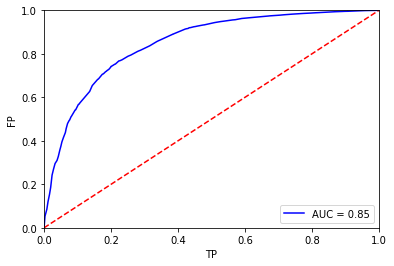

In [8]:
import pandas as pd
import matplotlib.pyplot as plt #
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
 
if __name__ == '__main__':
    matplotlib.rcParams['axes.unicode_minus'] = False
    data = pd.read_csv('WoeData.csv')
    Y=data['SeriousDlqin2yrs']
    X=data.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
    X1=sm.add_constant(X)
    logit=sm.Logit(Y,X1)
    result=logit.fit()
    print(result.params)
 
    test = pd.read_csv('TestWoeData.csv')
    Y_test = test['SeriousDlqin2yrs']
    X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
    X3 = sm.add_constant(X_test)
    resu = result.predict(X3)
    fpr, tpr, threshold = roc_curve(Y_test, resu)
    rocauc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('FP')
    plt.xlabel('TP')
    plt.show()

In [9]:
#Transfer the Result from logistic model to score card 
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores
 
#
def compute_score(series,cut,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list
coe=[9.738849,0.638002,0.505995,1.032246,1.790041,1.131956]
# 
p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)
# 
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x7 = get_score(coe[4], woex7, p)
x9 = get_score(coe[5], woex9, p)
print(x1,x2, x3, x7, x9)
test1 = pd.read_csv('TestData.csv')
test1['BaseScore']=Series(np.zeros(len(test1)))+baseScore
test1['x1'] = Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['age'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
test1['x7'] = Series(compute_score(test1['NumberOfTimes90DaysLate'], cutx7, x7))
test1['x9'] = Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x3'] + test1['x7'] +test1['x9']  + baseScore
test1.to_csv('ScoreData.csv', index=False)

[24.0, 22.0, 5.0, -20.0] [-8.0, -6.0, -4.0, -3.0, -1.0, 3.0, 7.0, 14.0, 16.0] [16.0, -27.0, -52.0, -70.0, -80.0] [20.0, -102.0, -142.0, -166.0, -160.0] [9.0, -60.0, -88.0, -95.0]
